# Heaps / Priority Queues

Heaps have a specialized *tree* structure. Priority queues are implemented using heaps (note that regular queues are implemented using linked lists) and the 2 are used interchangeably.

With a priority queue, elements are removed based on a specific priority. Elem with highest priority is removed first, regardless of the order in which it was added.

*Min heaps* have the smallest value (highest priority) at the root node. *Max heaps* have the largest value (highest priority) at the root node.

We use a min heap in this tutorial


## Heap Properties

**1. Structure property**

A binary heap is a binary tree that is a *complete* binary tree, where every single level of the tree is **filled completely**, except possibly the lowest level nodes, which are filled contiguously from **left to right**.

**2. Order property**

The order property for a min-heap is that all of the descendents should be greater than their ancestors. In other words, if we have a root with value `y`, every node in the right and the left sub-tree should have values greater than or equal to `y`. This is a recursive property, applying to every node.

> unlike BSTs, heaps may contain duplicate values

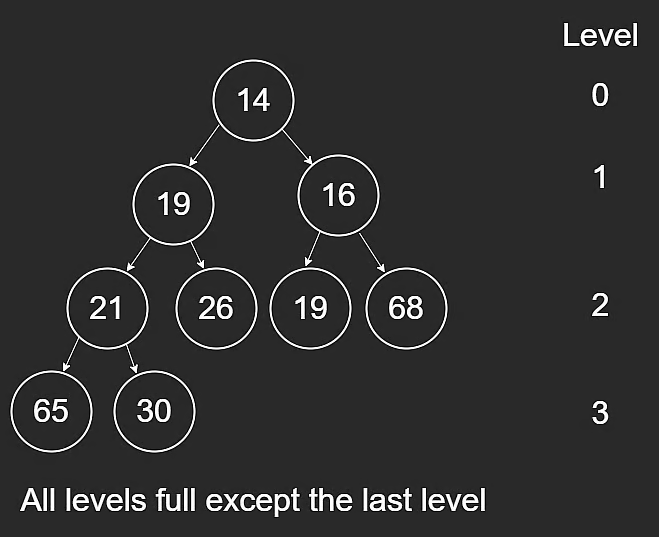

## Implementation

Binary heaps are implemented using **arrays**. We will take an array of size `n+1` where n is the number of nodes in our binary heap. We will visit our nodes in the same order as we visit nodes in breadth-first search - *level by level, from left to right*. We will insert these into our array in a contiguous fashion. However, we will *start filling them from index 1* instead of 0, for reasons we will discuss soon.

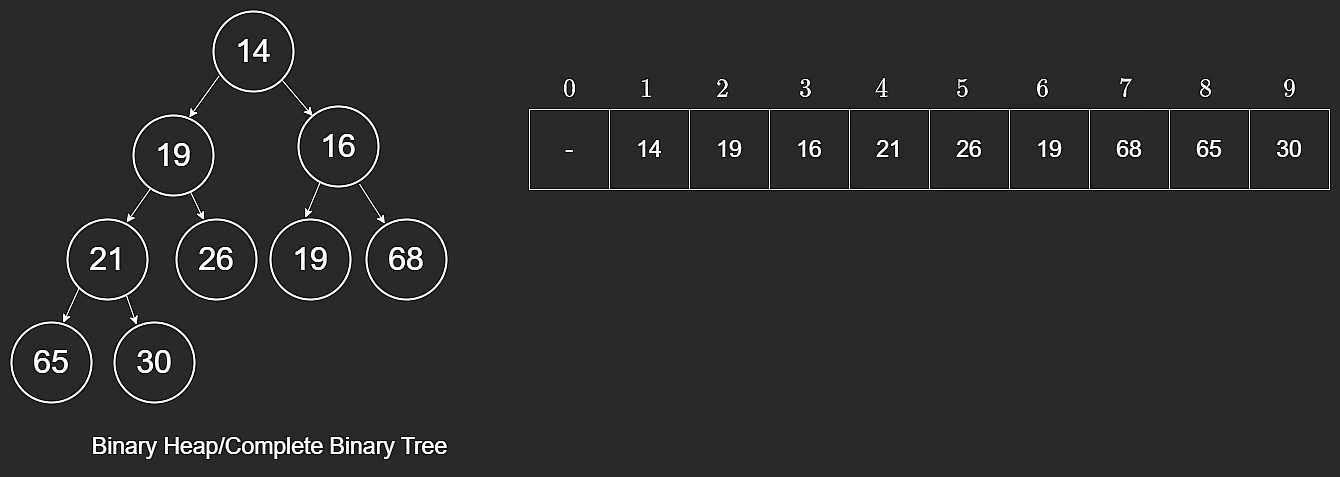

We fill in from index 1 because it helps us figure out where the node's parent or child node exists. Since binary heaps are complete binary trees, we dont need pointers and can do easy indexing. A node's left child/right child/parents are as follows, where `i` is the index of this node:

```python
leftchild=2*i
rightchild=2*i+1
#this is floor division
parent=i//2
```

For example, if we wanted to find leftchild/rightchild/parent of the node with value 19,

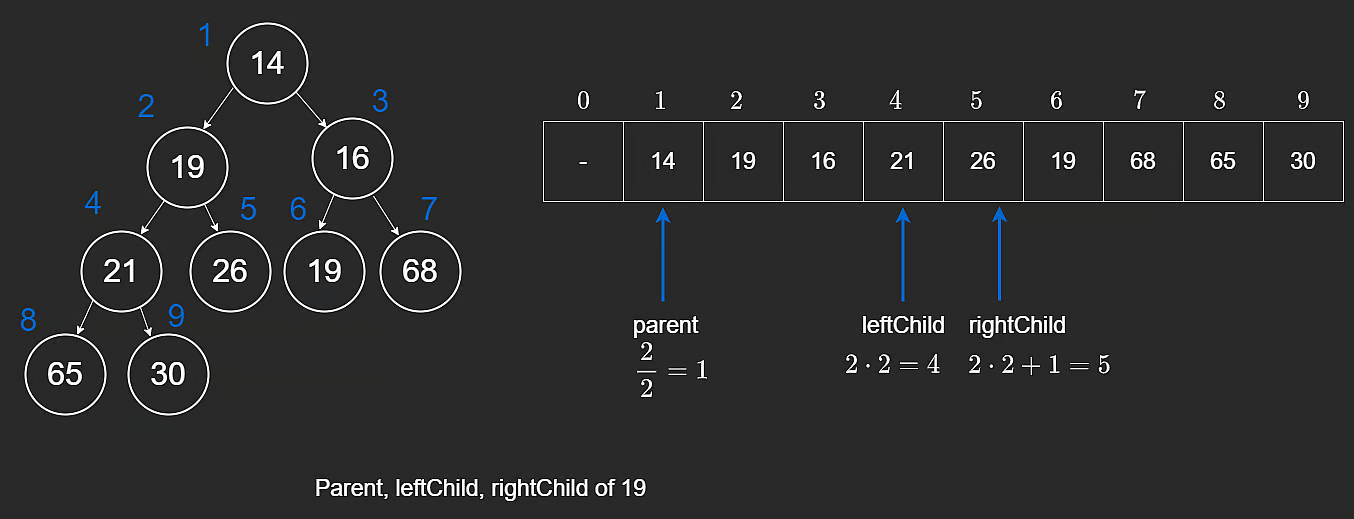

In [ ]:
# MinHeap Class Implementation
class MinHeap:
    def __init__(self):
        self.heap = [0]  # Initialize heap with a dummy value at index 0

    def push(self, val: int) -> None:
        """Pushes a value onto the heap."""
        self.heap.append(val)
        self._bubble_up(len(self.heap) - 1)

    def pop(self) -> int:
        """Pops the smallest value off the heap."""
        if len(self.heap) <= 1:
            return -1
        if len(self.heap) == 2:
            return self.heap.pop()
        
        # Move the last element to the root and bubble it down.
        root = self.heap[1]
        self.heap[1] = self.heap.pop()
        self._bubble_down(1)
        return root

    def top(self) -> int:
        """Returns the smallest value without popping it."""
        return self.heap[1] if len(self.heap) > 1 else -1

    def heapify(self, nums: List[int]) -> None:
        """Transforms a list into a heap in-place."""
        self.heap = [0] + nums
        for i in reversed(range(1, len(self.heap) // 2 + 1)):
            self._bubble_down(i)

    def _bubble_up(self, index: int) -> None:
        parent = index // 2
        while index > 1 and self.heap[parent] > self.heap[index]:
            self.heap[parent], self.heap[index] = self.heap[index], self.heap[parent]
            index = parent
            parent = index // 2

    def _bubble_down(self, index: int) -> None:
        child = 2 * index  # left child
        while child < len(self.heap):
            if child + 1 < len(self.heap) and self.heap[child] > self.heap[child + 1]:
                child += 1

            if self.heap[child] >= self.heap[index]:
                break

            self.heap[child], self.heap[index] = self.heap[index], self.heap[child]
            index = child
            child = 2 * index  # left child


In [ ]:
#default pythondict
# importing "heapq" to implement heap queue
import heapq

# initializing list
li = [5, 7, 9, 1, 3]

# using heapify to convert list into heap
heapq.heapify(li)

# printing created heap
print("The created heap is : ", end="")
print(list(li))

# using heappush() to push elements into heap
# pushes 4
heapq.heappush(li, 4)

# printing modified heap
print("The modified heap after push is : ", end="")
print(list(li))

# using heappop() to pop smallest element
print("The popped and smallest element is : ", end="")
print(heapq.heappop(li))
